In [66]:
# Importing Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Data Uploading
data = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data.shape

(962, 2)

In [5]:
data['Cleaned_Resume'] = ''

In [6]:
data.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [7]:
# Checking Unique Category
print(data['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [8]:
# Counting Different Categories
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Operations Manager           40
Data Science                 40
ETL Developer                40
Blockchain                   40
Mechanical Engineer          40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


In [9]:
# Checking Null Values 
data.isnull().sum()

Category          0
Resume            0
Cleaned_Resume    0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

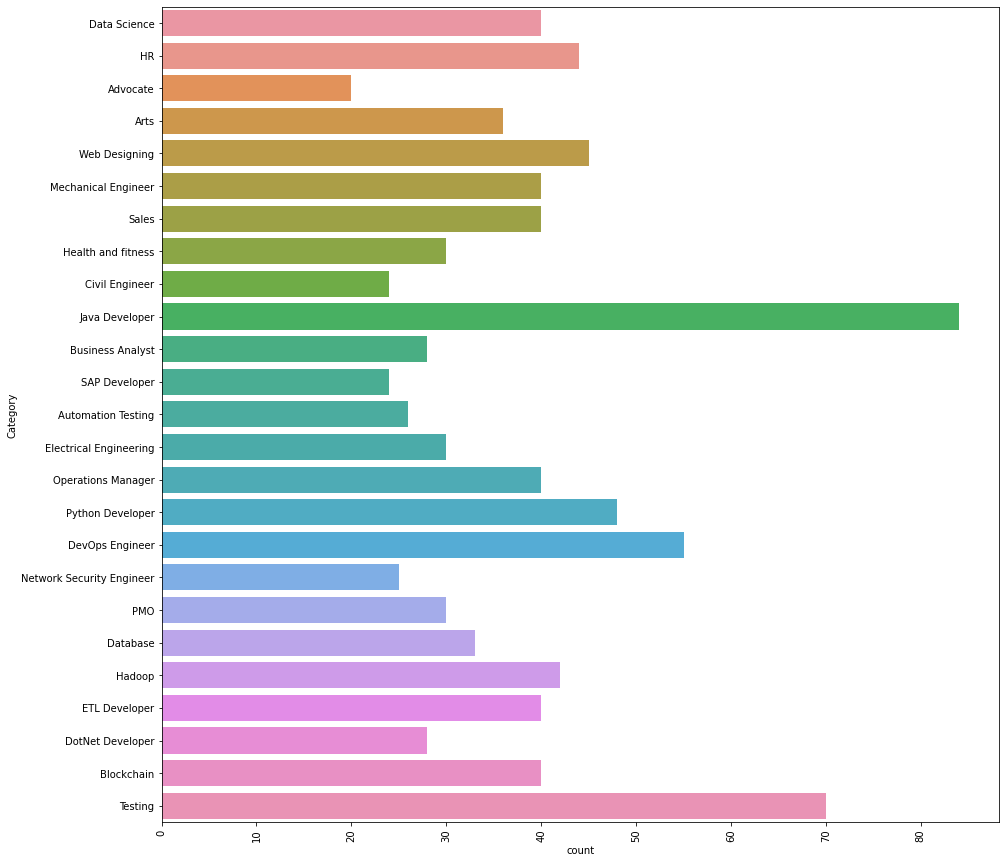

In [10]:
# Visualizing Categorize
plt.figure(figsize = (15,15))
plt.xticks(rotation=90)
sns.countplot( y = 'Category', data=data)

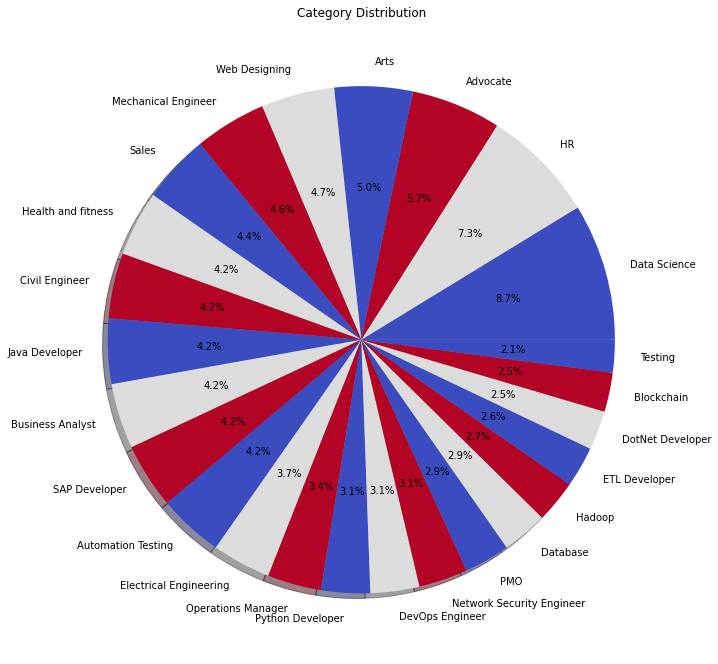

In [11]:
# Showing GridSpec 
from matplotlib.gridspec import GridSpec

targetCounts = data.Category.value_counts()
targetLabels = data.Category.unique()

plt.figure(1, figsize=(25,55))
the_gird = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_gird[0,1], aspect = 1, title = 'Category Distribution')

source_pie = plt.pie(targetCounts, labels = targetLabels, autopct = '%1.1f%%', shadow = True, colors= colors)
plt.show()

In [12]:
# Using Regular expressions to remove URL, Hashtags, mentions special letters,and punctuations
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    

In [13]:
data['Cleaned_Resume'] = data['Resume'].apply(lambda x: cleanResume(x))

In [14]:
data.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


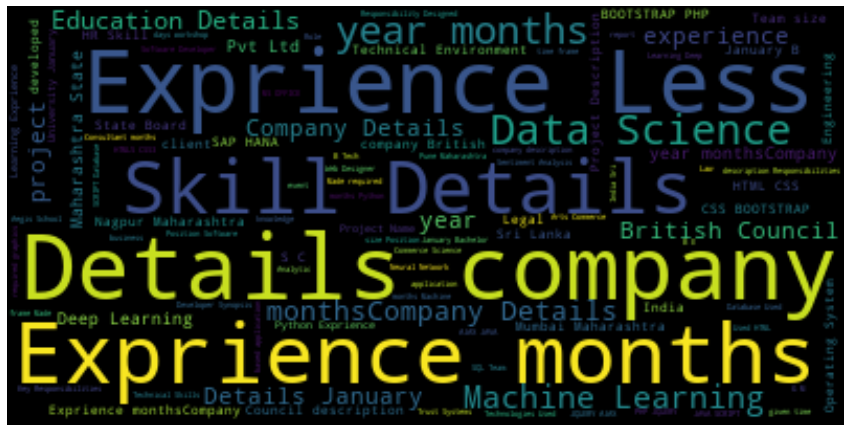

In [41]:
# Word Distribution and Word Cloud

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure( figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()



In [54]:
# Converting Words to Categorical Values:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']

le = LabelEncoder()


for i in var_mod:
    data[i] = le.fit_transform(data[i])



pandas.core.frame.DataFrame

In [62]:
# Training Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['Cleaned_Resume'].values 
requiredTarget = data['Category'].values

word_verctorizer = TfidfVectorizer (
    sublinear_tf= True,
    stop_words= 'english',
    max_features = 1500
)

word_verctorizer.fit(requiredText)

WordFeatures = word_verctorizer.transform(requiredText)

X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state =0 , test_size = 0.2 )
print(X_train.shape)
print(X_test.shape)



(769, 1500)
(193, 1500)


In [76]:
# Training Model Continues

clf = OneVsRestClassifier(KNeighborsClassifier())

clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

print("Accuracy of K Neihbors Classfier on training Set: {:.2f}".format(clf.score(X_train,y_train)))
print("Accuracy of K Neihbors Classfier on test Set: {:.2f}".format(clf.score(X_test,y_test)))


print("Classfication Report for Classfier  %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))





Accuracy of K Neihbors Classfier on training Set: 0.99
Accuracy of K Neihbors Classfier on test Set: 0.99
Classfication Report for Classfier  OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00   

AttributeError: 'OneVsRestClassifier' object has no attribute 'save_weights'